In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df= pd.read_csv ("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [21]:
df.drop_duplicates(['variety'])

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [23]:
df.value_counts(['variety'])

variety   
Setosa        46
Virginica     45
Versicolor    37
dtype: int64

In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

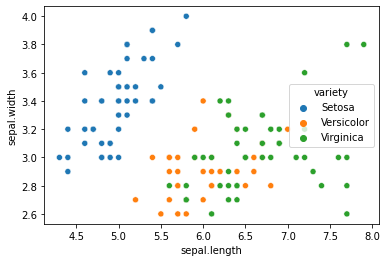

In [27]:
sns.scatterplot(x='sepal.length',y='sepal.width',hue='variety',data=df)

<AxesSubplot:xlabel='sepal.width', ylabel='count'>

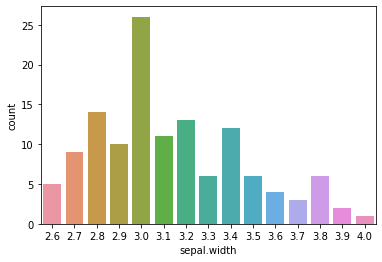

In [33]:
sns.countplot(x='sepal.width', data=df)

<AxesSubplot:xlabel='sepal.length', ylabel='count'>

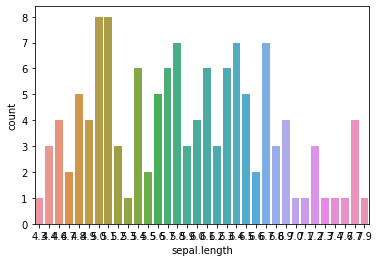

In [34]:
sns.countplot(x='sepal.length', data=df)

<AxesSubplot:xlabel='petal.length', ylabel='count'>

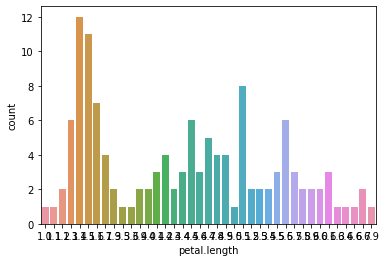

In [36]:
sns.countplot(x='petal.length', data=df)

<AxesSubplot:xlabel='petal.width', ylabel='count'>

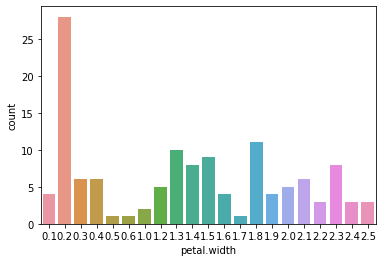

In [35]:
sns.countplot(x='petal.width', data=df)

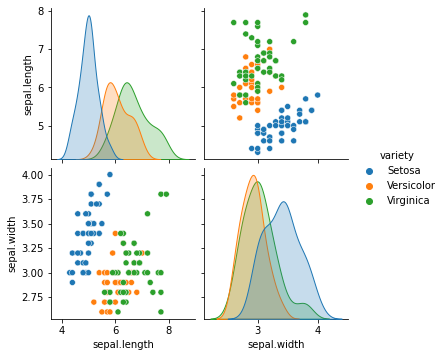

In [30]:
sns.pairplot(data=df, vars=['sepal.length', 'sepal.width'], hue='variety')

<AxesSubplot:ylabel='Density'>

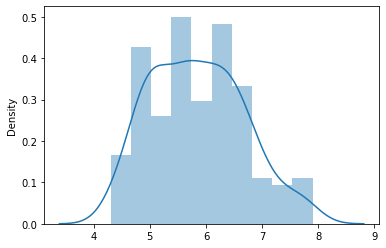

In [8]:
sns.distplot(x = df['sepal.length'],bins = 10)

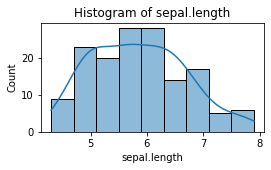

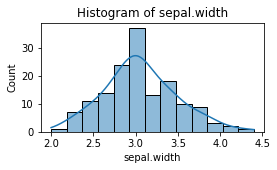

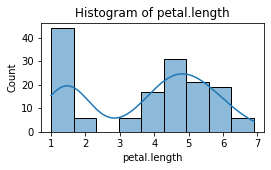

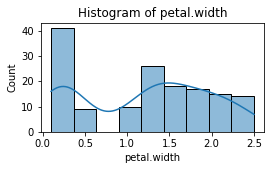

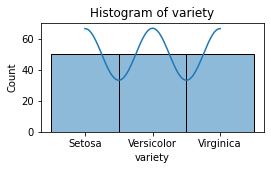

In [9]:

# Create histograms
for column in df.columns:
    plt.figure(figsize=(4,2))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


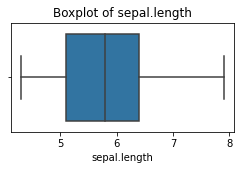

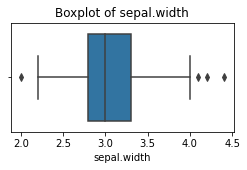

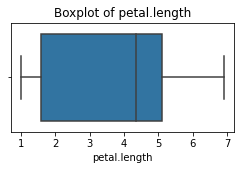

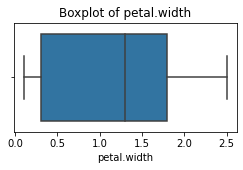

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 288x144 with 0 Axes>

In [11]:
# Create boxplots
for column in df.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


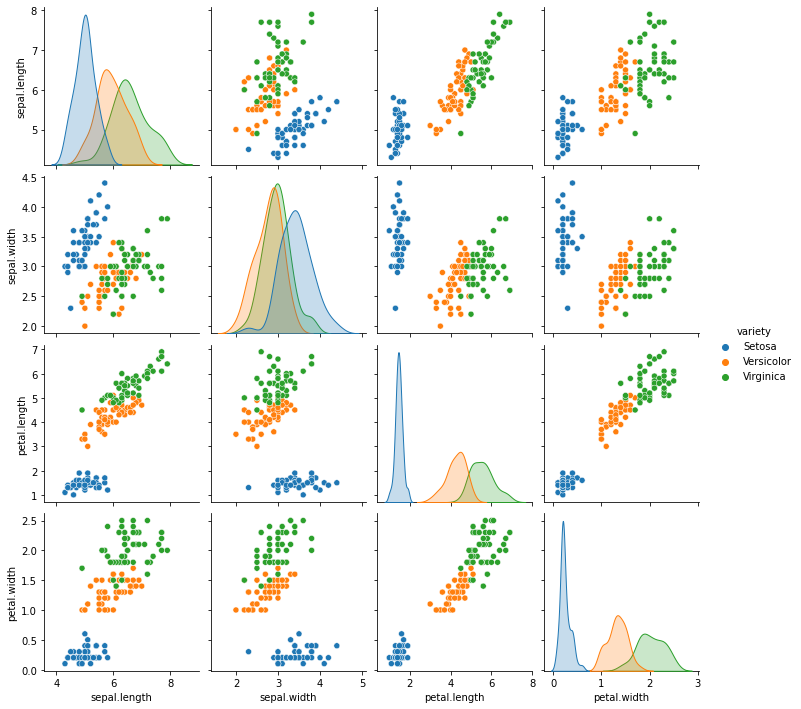

In [12]:
data = sns.pairplot(df,hue="variety") 
data

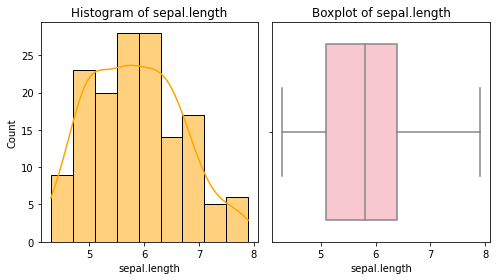

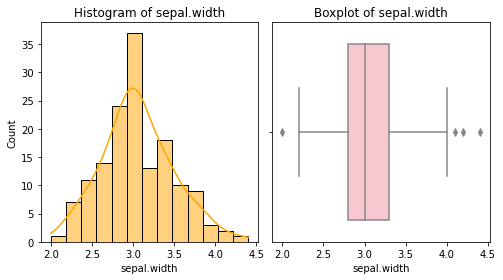

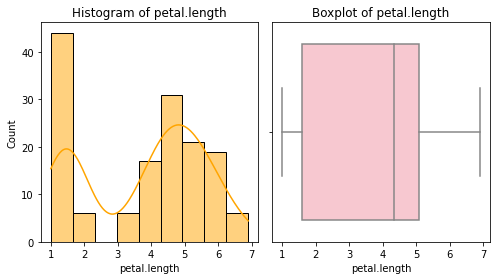

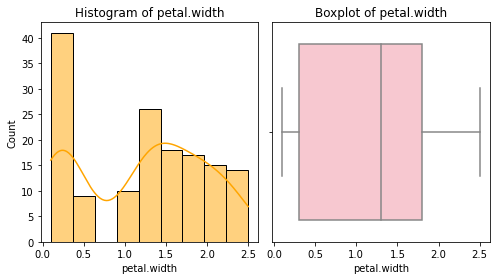

In [13]:
for column in df.columns[:-1]:  # Exclude the target variable for this analysis
    # Create a 1x2 grid for the plots
    fig, axes = plt.subplots(1, 2, figsize=(7,4))

    # Plot histogram
    sns.histplot(df[column], kde=True, ax=axes[0], color='orange')
    axes[0].set_title(f'Histogram of {column}')

    # Plot boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='pink')
    axes[1].set_title(f'Boxplot of {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [14]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
# Display the correlation matrix
print(correlation_matrix)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


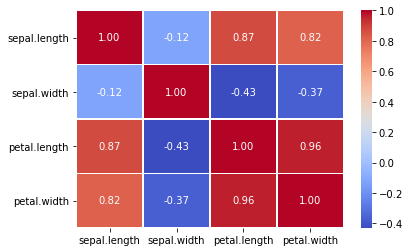

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [17]:
Q1 = np.percentile(df['sepal.width'],25, 
                 interpolation = 'midpoint')
Q3 = np.percentile(df['sepal.width'],75,
                 interpolation = 'midpoint')

# formula
IQR = Q3-Q1

print("Old Shape:", df.shape)


Old Shape: (150, 5)


In [18]:
#Upper bound
upper = np.where(df['sepal.width'] >= (Q3+1.5*IQR))

#Lower bound
Lower = np.where(df['sepal.width'] <= (Q3-1.5*IQR))

new shape: (128, 5)


<AxesSubplot:xlabel='sepal.width'>

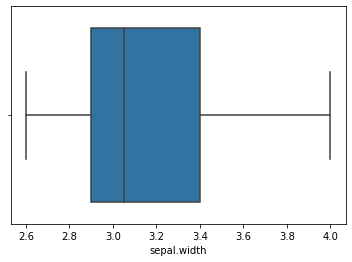

In [19]:
#Removing the outliers
df.drop(upper[0], inplace = True)
df.drop(Lower[0], inplace = True)

print('new shape:', df.shape)

sns.boxplot(x='sepal.width', data=df)
